# *Mushroom Classification Tabular Project*

### *Miryam Ochoa*
### *DATA3402*
### *Dec.11, 2024* 

##### Dataset: https://www.kaggle.com/datasets/uciml/mushroom-classification
##### Challenge: Which features are indicative of a poisionous mushroom? 
##### Data Description: mushrooms.csv(374 kB) and 23 categorical Features


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## EDA

In [3]:
print(df.shape)

(8124, 23)


In [4]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [5]:
for col in df.columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())

Unique values in 'class':
['p' 'e']
Unique values in 'cap-shape':
['x' 'b' 's' 'f' 'k' 'c']
Unique values in 'cap-surface':
['s' 'y' 'f' 'g']
Unique values in 'cap-color':
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Unique values in 'bruises':
['t' 'f']
Unique values in 'odor':
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Unique values in 'gill-attachment':
['f' 'a']
Unique values in 'gill-spacing':
['c' 'w']
Unique values in 'gill-size':
['n' 'b']
Unique values in 'gill-color':
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Unique values in 'stalk-shape':
['e' 't']
Unique values in 'stalk-root':
['e' 'c' 'b' 'r' '?']
Unique values in 'stalk-surface-above-ring':
['s' 'f' 'k' 'y']
Unique values in 'stalk-surface-below-ring':
['s' 'f' 'y' 'k']
Unique values in 'stalk-color-above-ring':
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
Unique values in 'stalk-color-below-ring':
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
Unique values in 'veil-type':
['p']
Unique values in 'veil-color':
['w' 'n' 'o' 'y']
Unique 

In [6]:
# missing values
print(df.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [7]:
df.describe() # freq is how often 'top' value appears 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


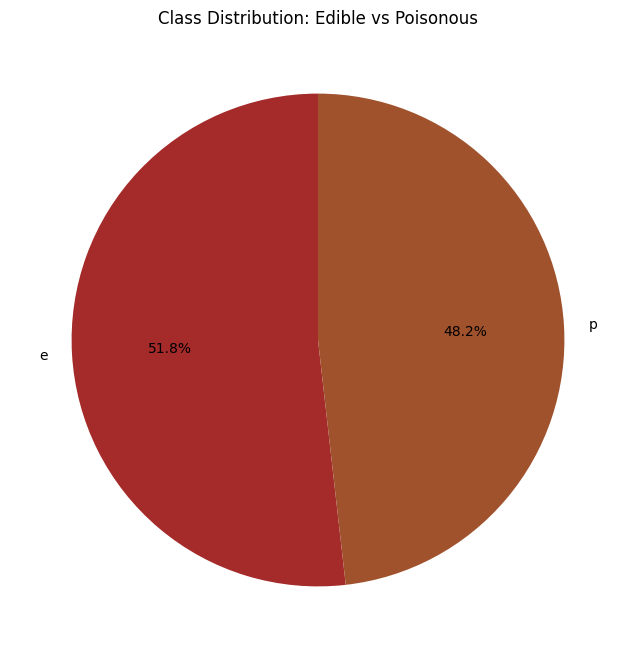

In [8]:
# check if there is a class imbalance : well balanced Target feature

class_counts = df['class'].value_counts()
labels = class_counts.index  # ['e', 'p']
sizes = class_counts.values  

colors = ['brown', 'Sienna']

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Class Distribution: Edible vs Poisonous')
plt.show()


## Visualization

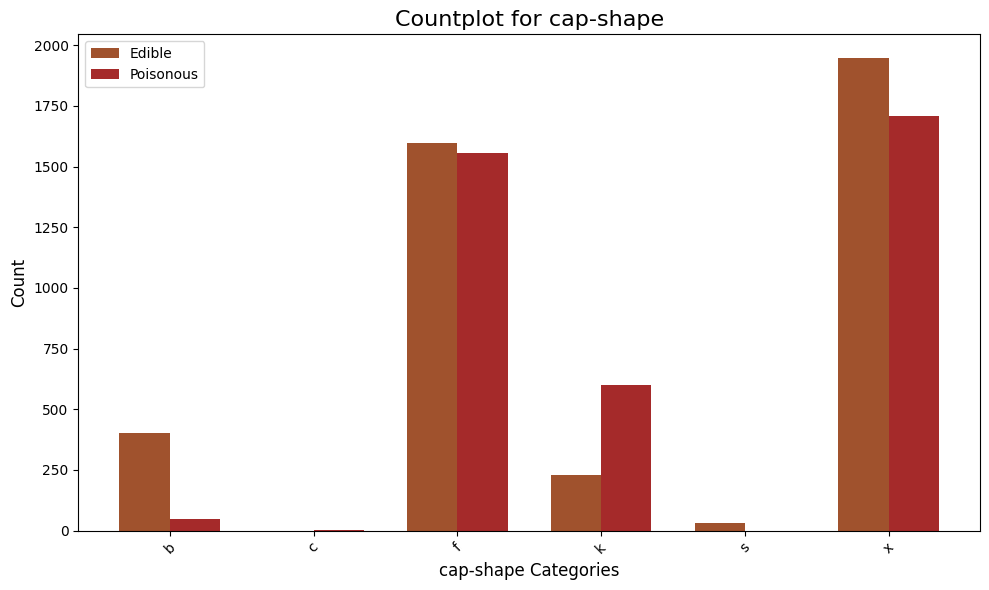

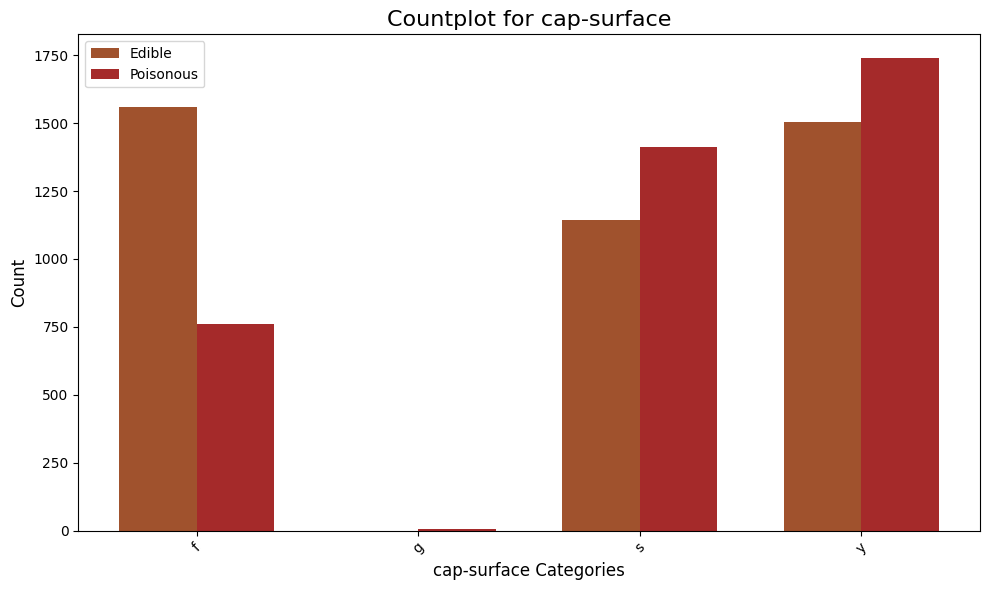

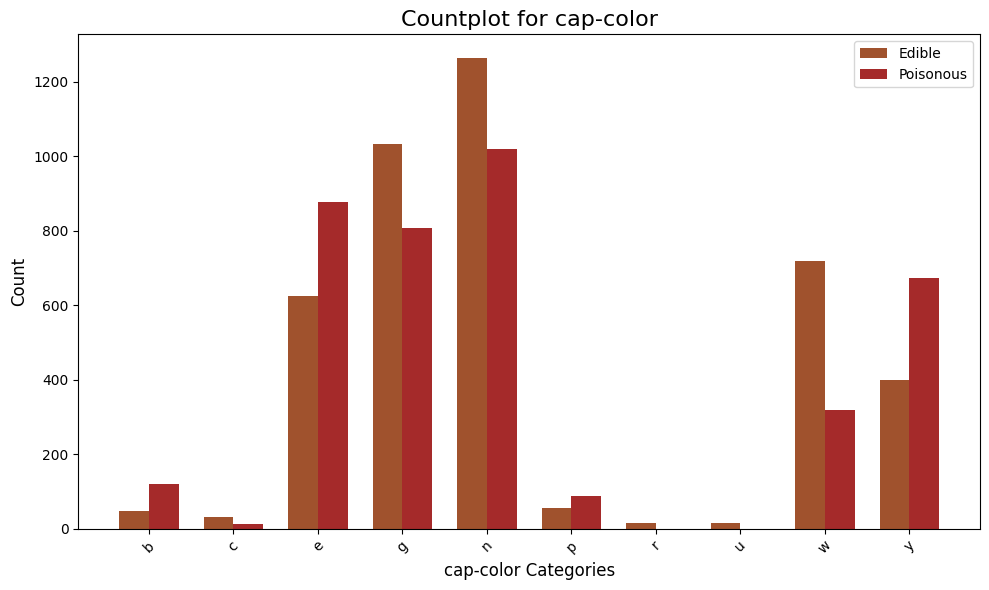

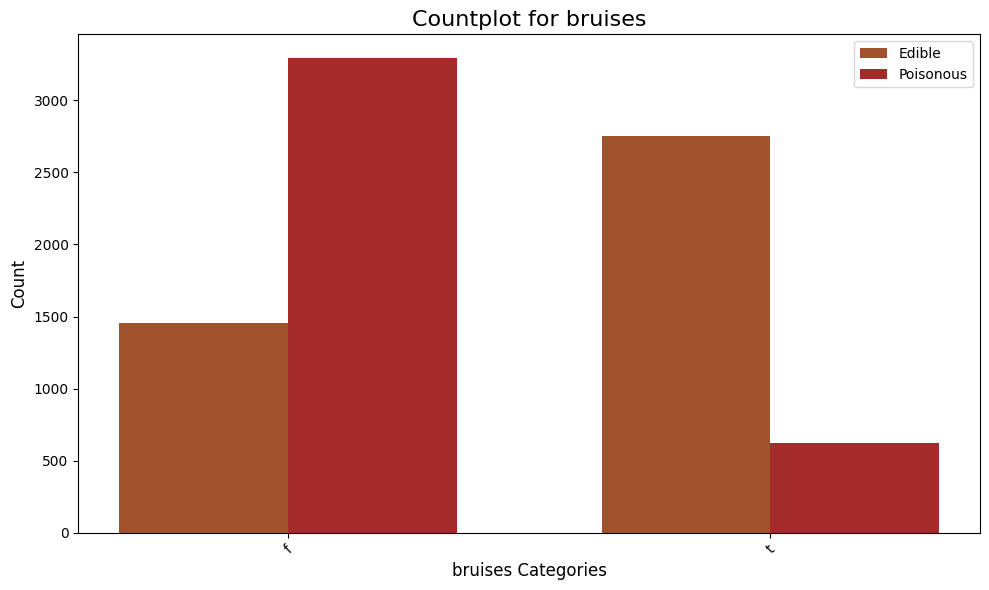

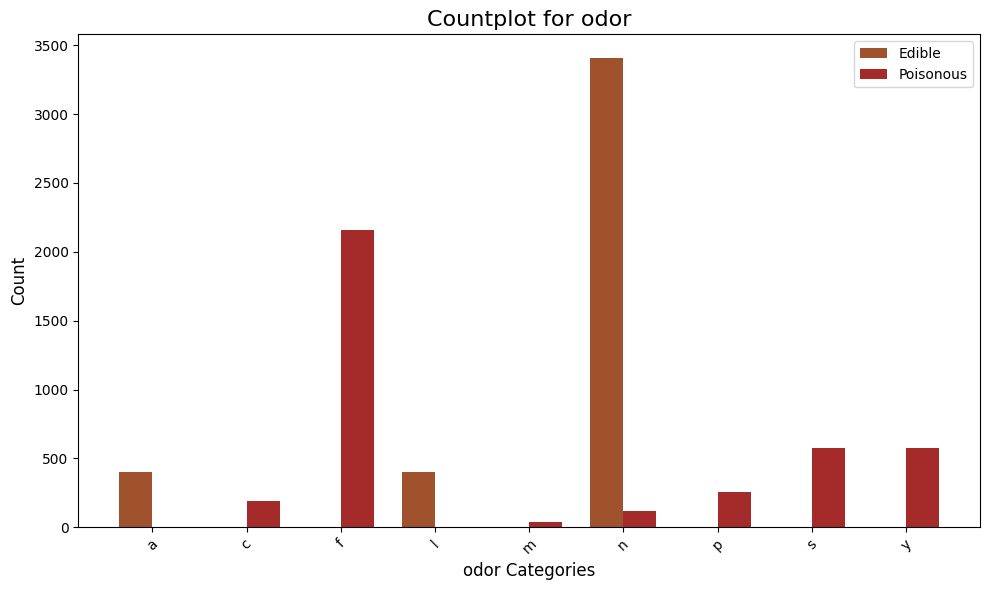

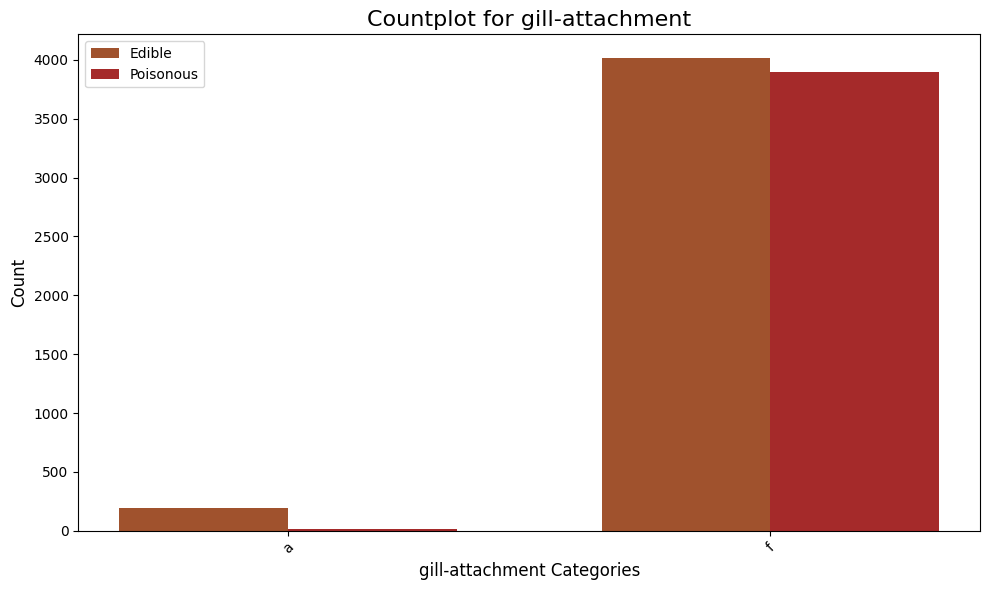

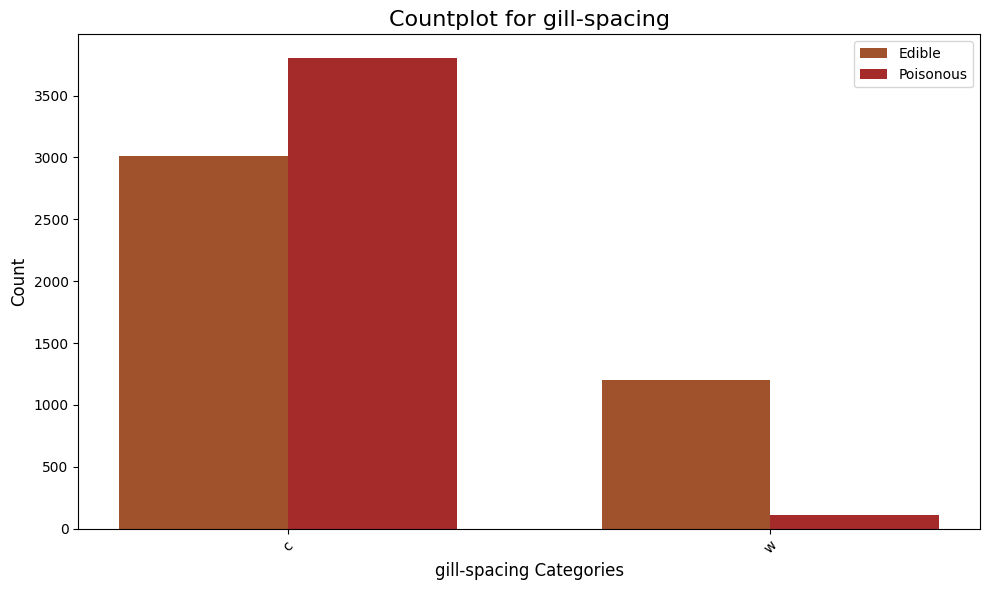

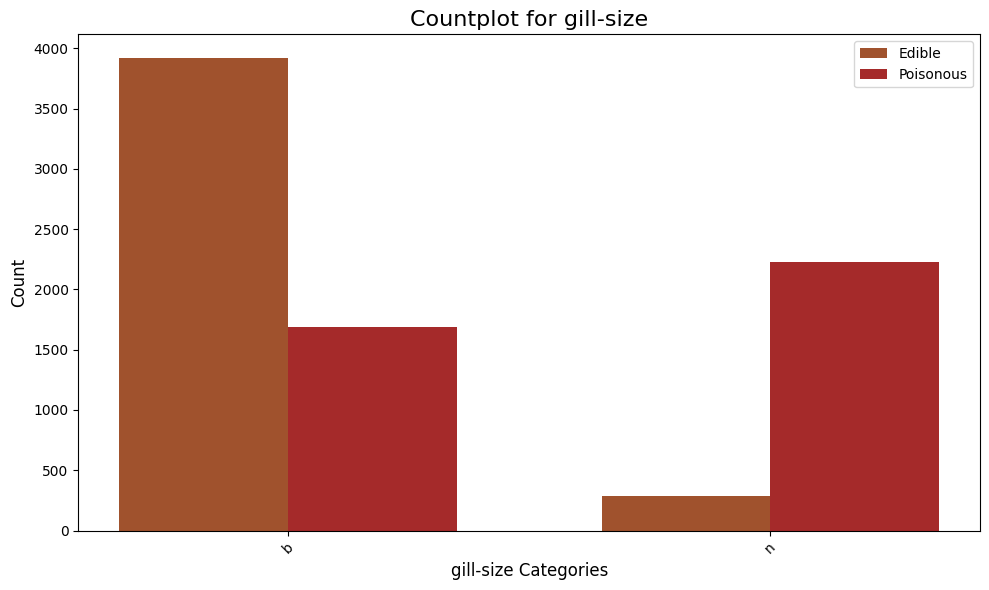

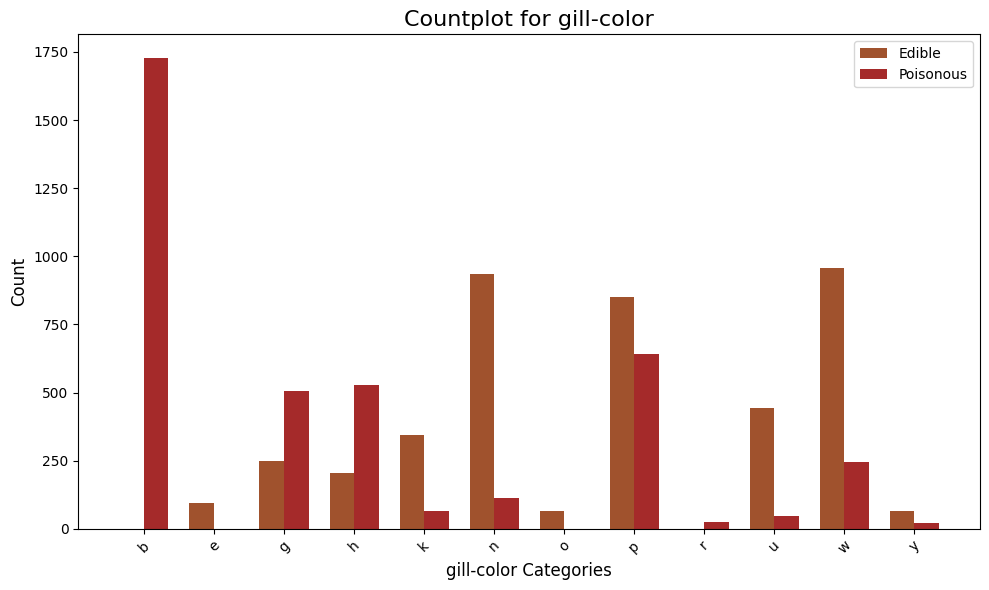

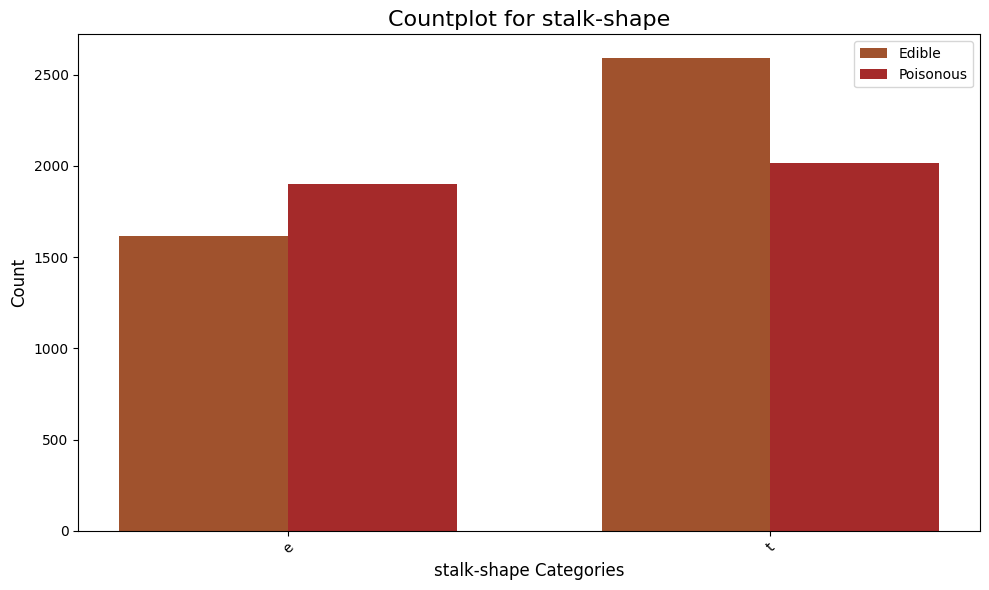

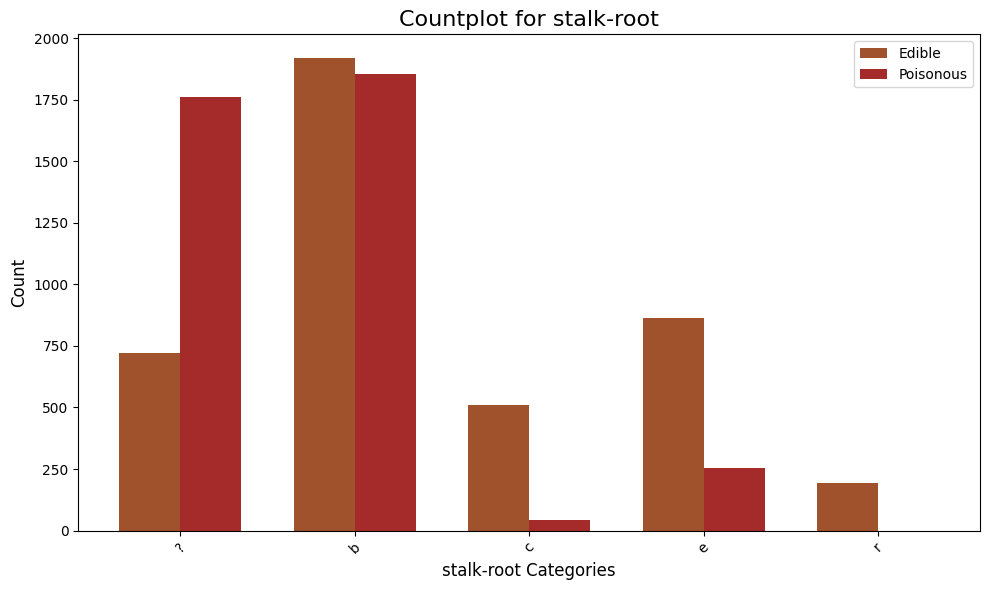

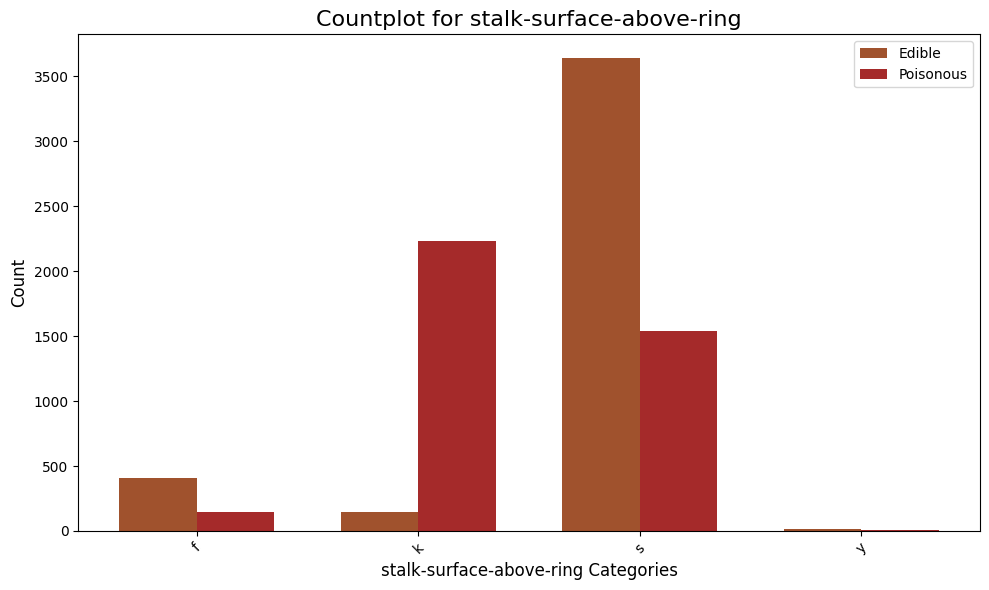

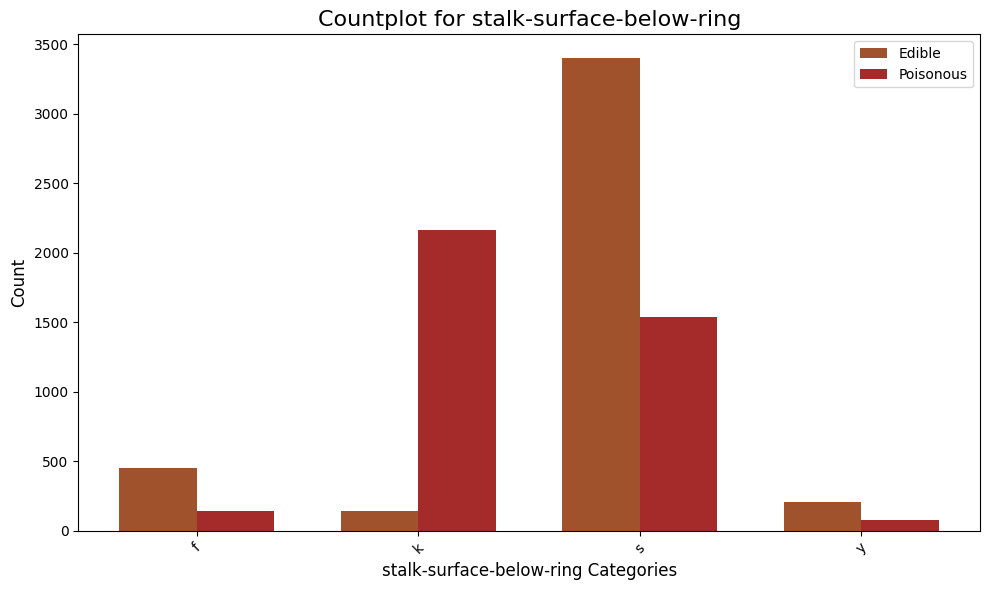

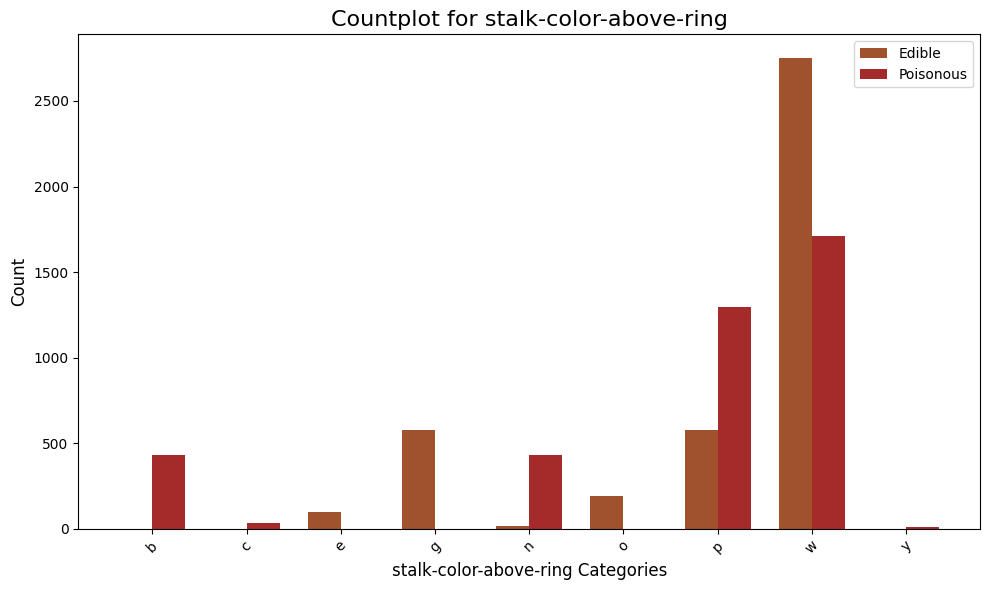

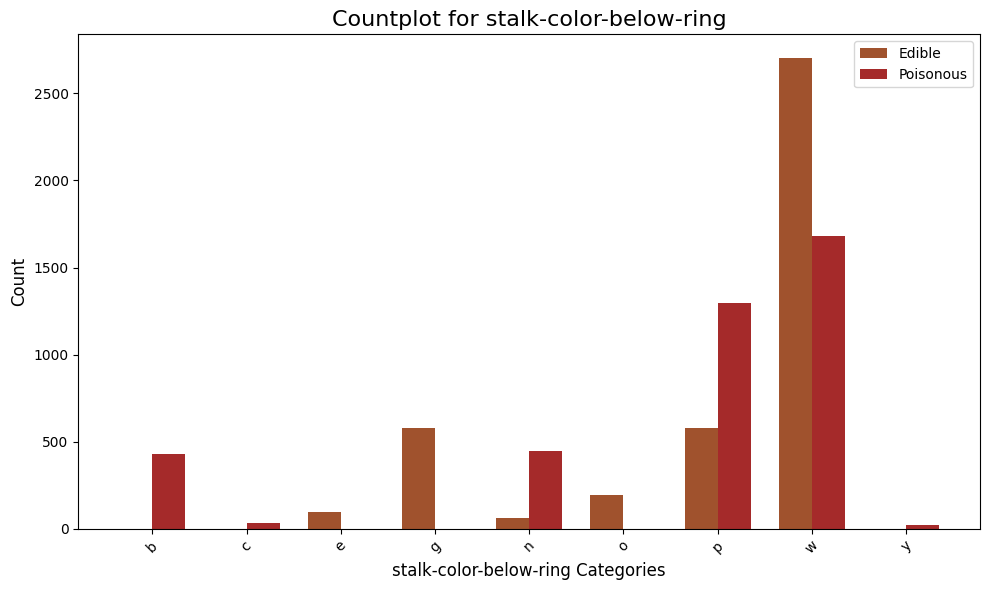

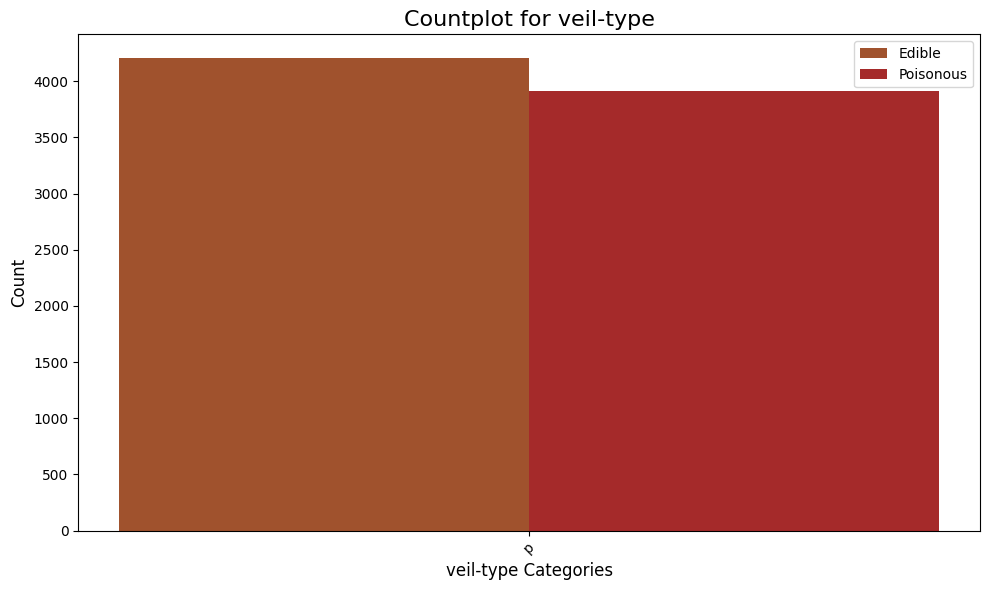

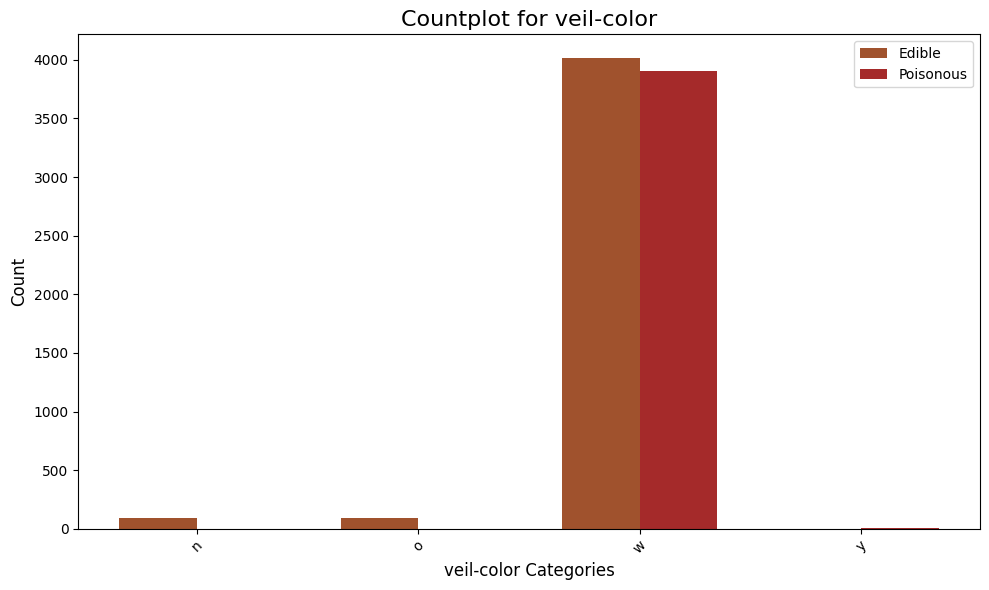

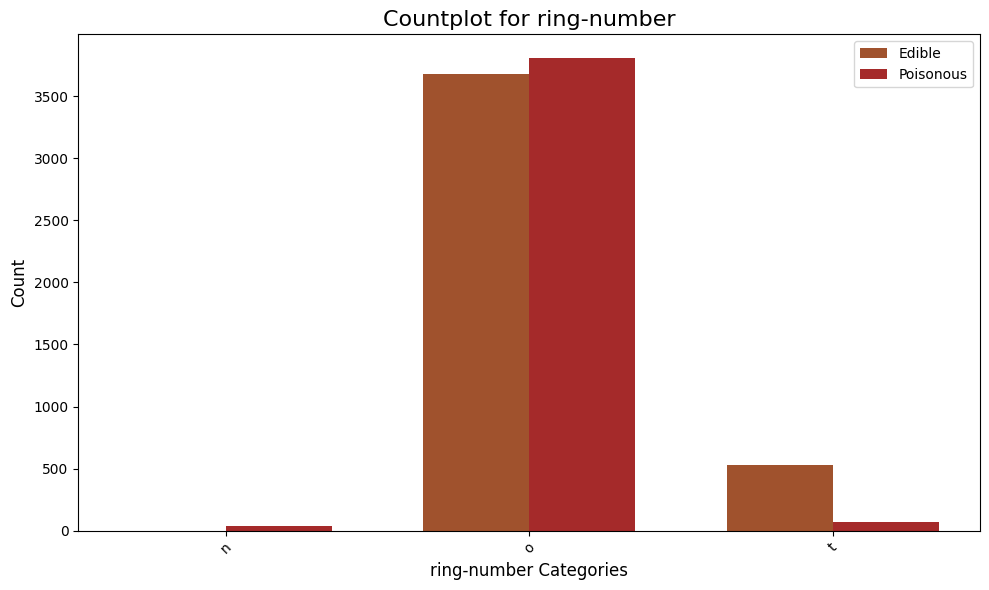

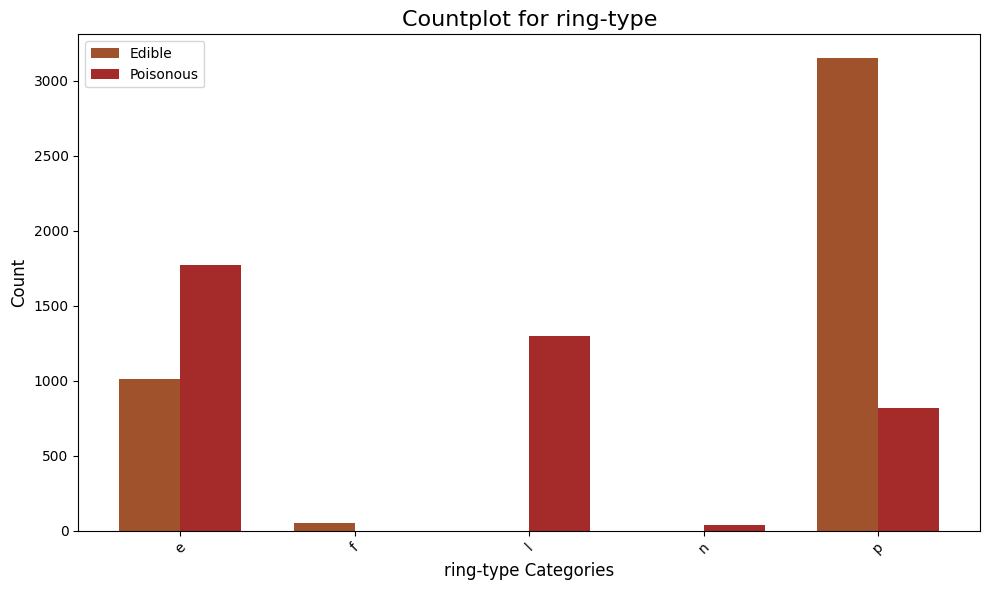

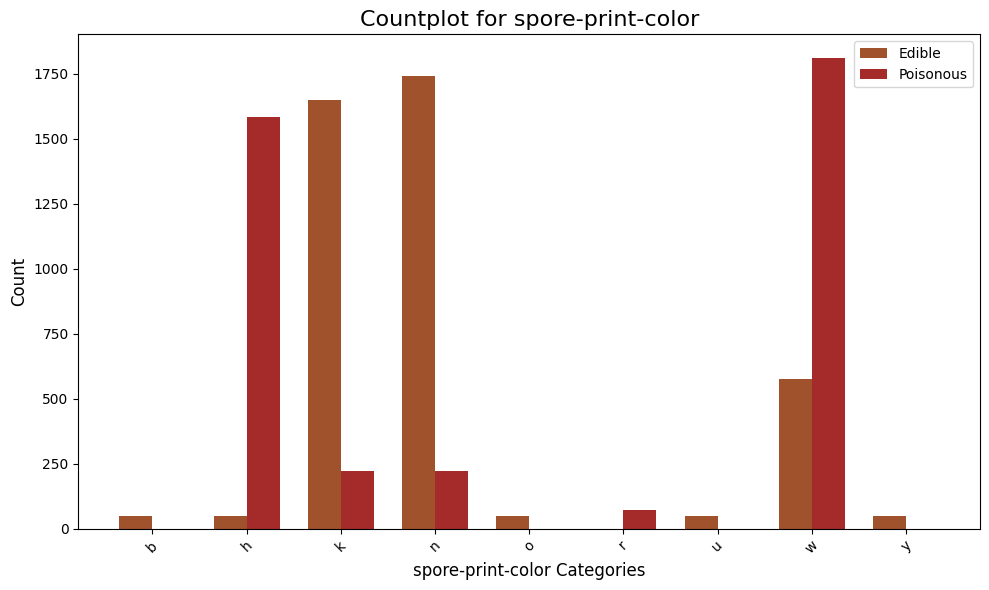

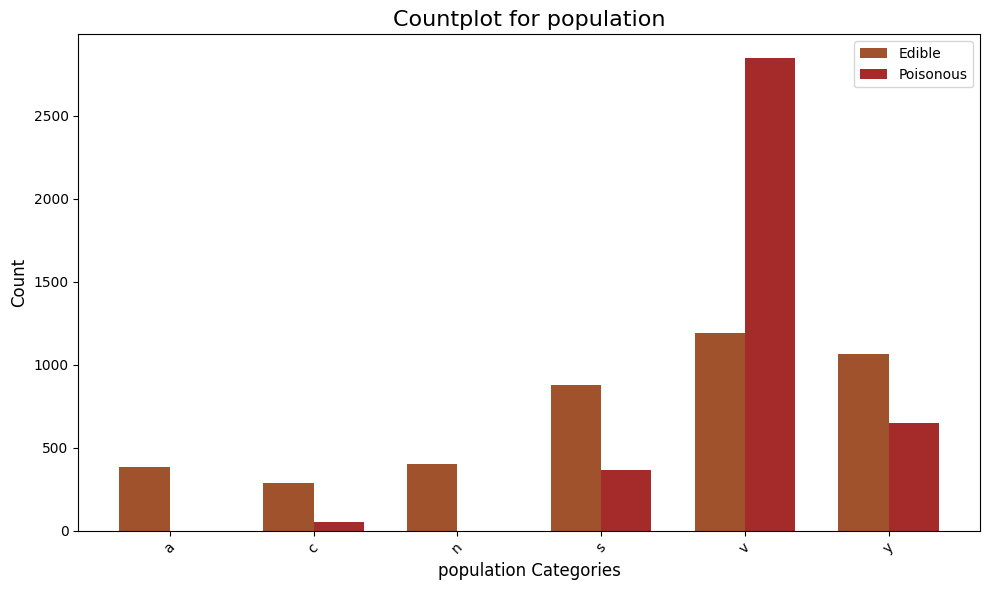

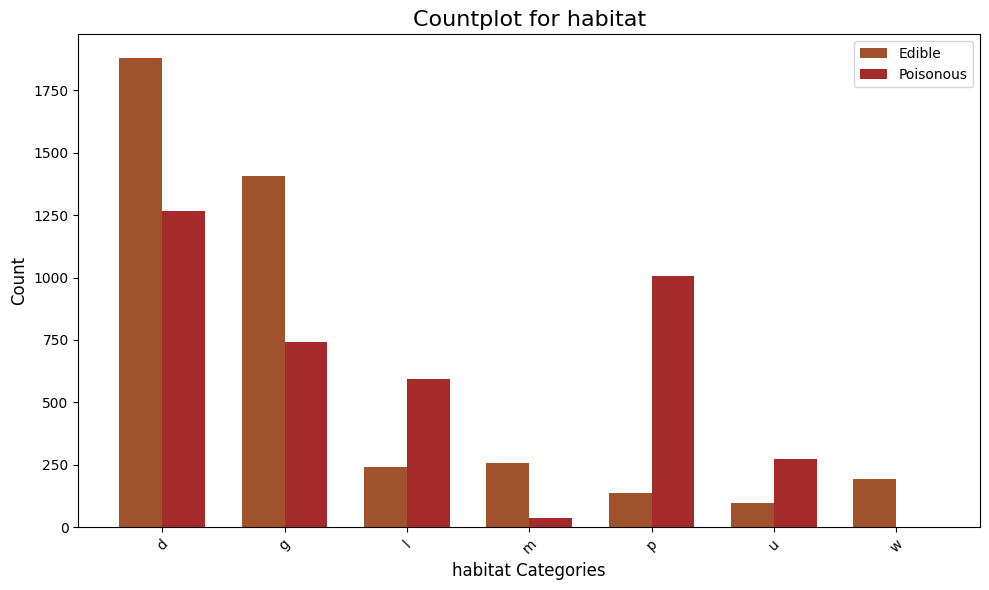

In [9]:
# Visualize the freq of e and p for each variable

for feature in df.columns[df.columns != 'class']:
    # Group by feature and class to get counts
    feature_counts = df.groupby([feature, 'class']).size().unstack(fill_value=0)

    # Plot counts for the current feature
    fig, ax = plt.subplots(figsize=(10, 6))
    x = range(len(feature_counts.index))  # X positions
    width = 0.35  # Width of the bars
    # Plot 'e' 
    ax.bar(x, feature_counts['e'], width, label='Edible', color='Sienna')
    # Plot 'p' 
    ax.bar([i + width for i in x], feature_counts['p'], width, label='Poisonous', color='brown')

    ax.set_xlabel(f'{feature} Categories', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'Countplot for {feature}', fontsize=16)
    ax.set_xticks([i + width / 2 for i in x])
    ax.set_xticklabels(feature_counts.index, rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.show()

In [10]:
feature = 'odor'  

edible_counts = df[df['class'] == 'e'].groupby(feature).size()
poisonous_counts = df[df['class'] == 'p'].groupby(feature).size()

# Convert them into a DataFrame for easier comparison
comparison_table = pd.DataFrame({
    'Edible': edible_counts,
    'Poisonous': poisonous_counts
}).fillna(0).astype(int)

comparison_table.loc['Total'] = comparison_table.sum()

print(comparison_table)

       Edible  Poisonous
odor                    
a         400          0
c           0        192
f           0       2160
l         400          0
m           0         36
n        3408        120
p           0        256
s           0        576
y           0        576
Total    4208       3916


In [11]:
feature = 'gill-color' 

edible_counts = df[df['class'] == 'e'].groupby(feature).size()
poisonous_counts = df[df['class'] == 'p'].groupby(feature).size()
comparison_table = pd.DataFrame({
    'Edible': edible_counts,
    'Poisonous': poisonous_counts
}).fillna(0).astype(int)

comparison_table.loc['Total'] = comparison_table.sum()

print(comparison_table)

            Edible  Poisonous
gill-color                   
b                0       1728
e               96          0
g              248        504
h              204        528
k              344         64
n              936        112
o               64          0
p              852        640
r                0         24
u              444         48
w              956        246
y               64         22
Total         4208       3916


In [12]:
feature = 'habitat' 

edible_counts = df[df['class'] == 'e'].groupby(feature).size()
poisonous_counts = df[df['class'] == 'p'].groupby(feature).size()

comparison_table = pd.DataFrame({
    'Edible': edible_counts,
    'Poisonous': poisonous_counts
}).fillna(0).astype(int)

comparison_table.loc['Total'] = comparison_table.sum()
print(comparison_table)


         Edible  Poisonous
habitat                   
d          1880       1268
g          1408        740
l           240        592
m           256         36
p           136       1008
u            96        272
w           192          0
Total      4208       3916


In [13]:
# Cramér's V: association btw 2 cat variables from 0-1
def cramers_v(confusion_matrix):
    chi2, p, dof, expected = stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

#calculate the Cramér's V correlation matrix
def cramers_v_matrix(df):
    corr_matrix = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)
    
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2:
                confusion_matrix = pd.crosstab(df[col1], df[col2])
                corr_matrix.loc[col1, col2] = cramers_v(confusion_matrix)
            else:
                corr_matrix.loc[col1, col2] = 1
    return corr_matrix
cramers_v_corr = cramers_v_matrix(df)

/tmp/ipykernel_7999/2425957393.py:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
/tmp/ipykernel_7999/2425957393.py:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
/tmp/ipykernel_7999/2425957393.py:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
/tmp/ipykernel_7999/2425957393.py:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
/tmp/ipykernel_7999/2425957393.py:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
/tmp/ipykernel_7999/2425957393.py:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
/tmp/ipykernel_7999/2425957393.py:5: RuntimeWarning: invalid value encounter

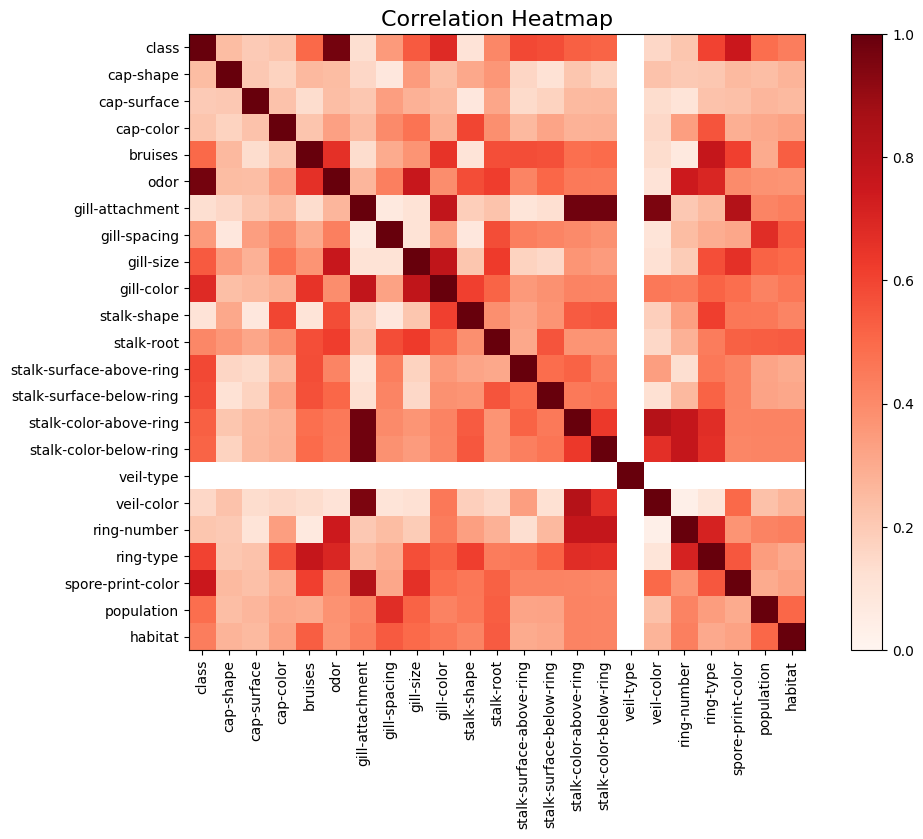

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
heat = ax.imshow(cramers_v_corr, cmap='Reds', vmin=0, vmax=1)
fig.colorbar(heat)

# Set axis labels and title
ax.set_xticks(np.arange(len(cramers_v_corr.columns)))
ax.set_yticks(np.arange(len(cramers_v_corr.columns)))
ax.set_xticklabels(cramers_v_corr.columns, rotation=90)
ax.set_yticklabels(cramers_v_corr.columns)
plt.title("Correlation Heatmap", fontsize=16)

plt.show()


There are a few highly correlated features here: mostly related to gill attachment. Next step would be to remove one of the redundant features and veil-type. 

## Data cleaning

In [15]:
# Drop veil type
df = df.drop(columns = ['veil-type', 'stalk-color-below-ring'])
print(df.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')


In [16]:
# Label encode
label = LabelEncoder()
for column in df.columns:
   df[column] = label.fit_transform(df[column])

In [17]:
## DT Benchmark
X = df.drop('class', axis=1)
y = df['class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

print(classification_report(y_test, y_pred))



Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Recall :  all actual positives are correctly identified, good at detecting poisonous mushroom.
support : indicates balance throughout data being identified

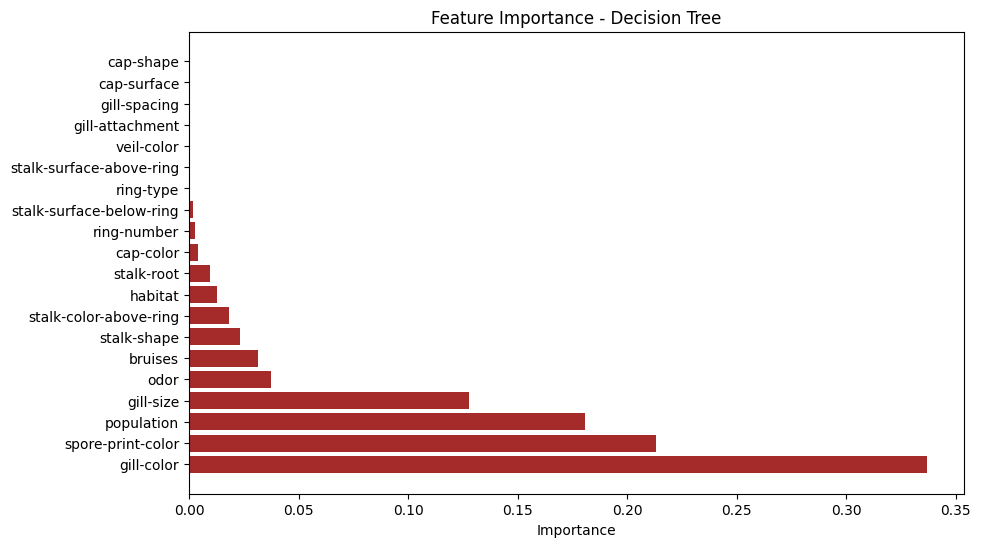

In [18]:
# Feature importance
dt_importance = dt.feature_importances_
dt_features = X_train.columns
indices = np.argsort(dt_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Decision Tree")
plt.barh(range(X_train.shape[1]), dt_importance[indices], align="center", color='brown')
plt.yticks(range(X_train.shape[1]), [dt_features[i] for i in indices])
plt.xlabel("Importance")
plt.show()

In [19]:
# remove features
# Dropping the specified columns from the DataFrame
columns_to_drop = ['stalk-surface-above-ring', 'cap-shape', 'gill-spacing', 'cap-surface']
X_train_new = X_train.drop(columns=columns_to_drop)


## Classification Model and Evaluation

#### RF

In [20]:
X = X_train_new
y = y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators= 50, max_depth =10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
report_rf = classification_report(y_test, y_pred)
print("Classification Report:")
print(report_rf)
# using gri search 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       664
           1       1.00      1.00      1.00       636

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



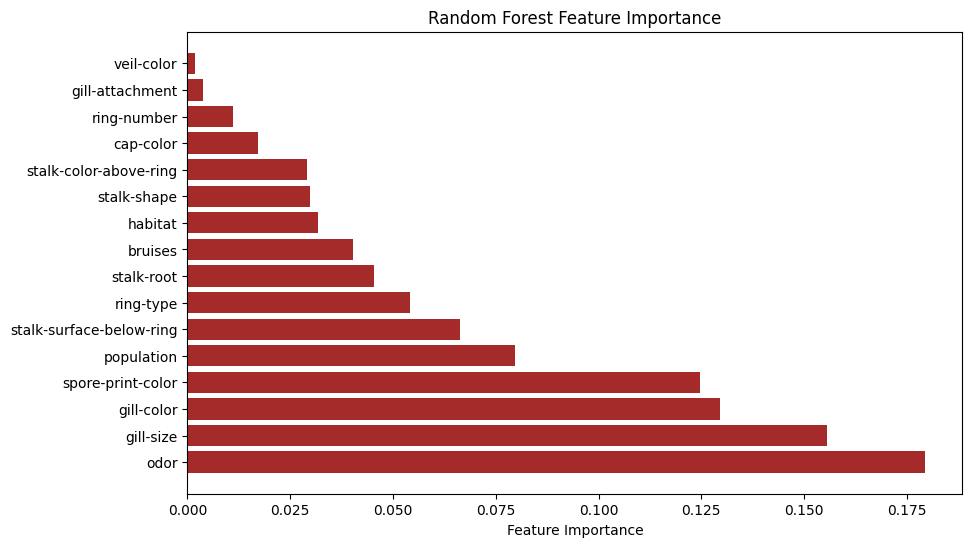

In [21]:
# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame with feature names and their importance scores
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='brown')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


#### XG Boost

In [23]:
xg = xgb.XGBClassifier(learning_rate=0.02)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='brown')
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()

NameError: name 'xg' is not defined

In [ ]:
#Techniques like  adding more data to make the dataset larger or feature engineer
# 